<a href="https://colab.research.google.com/github/HakkinDavid/multiprotocol-server-app/blob/main/analysis/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("gerardojaimeescareo/ligamx-matches-2016-2022")

print("Path to dataset files:", path)

100%|██████████| 157k/157k [00:00<00:00, 43.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gerardojaimeescareo/ligamx-matches-2016-2022/versions/3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
data = pd.read_csv(f'{path}/2016-2024_liga_mx.csv')
data

,id,referee,timezone,date,venue_id,venue_name,venue_city,season,round,home_team,...,home_goals,away_goals,home_goals_half_time,away_goals_half_time,home_goals_fulltime,away_goals_fulltime,home_goals_extra_time,away_goals_extratime,home_goals_penalty,away_goals_penalty
0,864095,D. Quintero,UTC,2022-07-02T02:05:00+00:00,10546.0,Estadio de Mazatlán,Mazatlán,2022,Apertura - 1,Mazatlán,...,2.0,4.0,0.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN
1,864096,I. Lopez,UTC,2022-07-02T22:00:00+00:00,1076.0,Estadio AKRON,Zapopan,2022,Apertura - 1,Guadalajara Chivas,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,864094,L. Santander,UTC,2022-07-02T22:00:00+00:00,1080.0,Estadio Victoria de Aguascalientes,Aguascalientes,2022,Apertura - 1,Necaxa,...,1.0,3.0,1.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN
3,864097,Ó. Mejía,UTC,2022-07-03T00:05:00+00:00,1087.0,Estadio Universitario de Nuevo León,San Nicolás de los Garza,2022,Apertura - 1,Tigres UANL,...,2.0,3.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN
4,864098,F. Guerrero,UTC,2022-07-03T02:05:00+00:00,7182.0,Estadio Azteca,D.F.,2022,Apertura - 1,Club America,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871,143583,"Marco Antonio Ortiz Nava, Mexico",UTC,2017-05-19T02:30:00+00:00,NaN,Estadio Universitario (UANL),Monterrey,2016,Clausura - Semi-finals,Tigres UANL,...,2.0,0.0,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
2872,143582,"Luis Santander, Mexico",UTC,2017-05-21T23:06:00+00:00,NaN,Estadio Akron,Guadalajara,2016,Clausura - Semi-finals,Guadalajara Chivas,...,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN
2873,143584,"Jorge Antonio Perez Duran, Mexico",UTC,2017-05-22T01:00:00+00:00,1088.0,Estadio Caliente,Tijuana,2016,Clausura - Semi-finals,Club Tijuana,...,0.0,2.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN
2874,143579,"Oscar Macias, Mexico",UTC,2017-05-26T02:00:00+00:00,NaN,Estadio Universitario (UANL),Monterrey,2016,Clausura - Finals,Tigres UANL,...,2.0,2.0,0.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2876 non-null   int64  
 1   referee                2605 non-null   object 
 2   timezone               2876 non-null   object 
 3   date                   2876 non-null   object 
 4   venue_id               1976 non-null   float64
 5   venue_name             2876 non-null   object 
 6   venue_city             2695 non-null   object 
 7   season                 2876 non-null   int64  
 8   round                  2876 non-null   object 
 9   home_team              2876 non-null   object 
 10  away_team              2876 non-null   object 
 11  home_win               2066 non-null   object 
 12  away_win               2066 non-null   object 
 13  home_goals             2813 non-null   float64
 14  away_goals             2813 non-null   float64
 15  home

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2876.0,552402.489221,399038.709798,120158.0,143629.75,569761.5,864226.25,1320867.0
venue_id,1976.0,3925.280870,5636.598202,1069.0,1081.00,1087.0,1965.00,20476.0
season,2876.0,2019.785118,2.458787,2016.0,2018.00,2020.0,2022.00,2024.0
home_goals,2813.0,1.507999,1.224900,0.0,1.00,1.0,2.00,9.0
away_goals,2813.0,1.149662,1.069424,0.0,0.00,1.0,2.00,6.0
home_goals_half_time,2813.0,0.672236,0.807108,0.0,0.00,0.0,1.00,6.0
away_goals_half_time,2813.0,0.515819,0.705734,0.0,0.00,0.0,1.00,5.0
home_goals_fulltime,2813.0,1.505866,1.224332,0.0,1.00,1.0,2.00,9.0
away_goals_fulltime,2813.0,1.148596,1.069074,0.0,0.00,1.0,2.00,6.0
home_goals_extra_time,16.0,0.375000,0.885061,0.0,0.00,0.0,0.00,3.0


## Preprocesamiento y Limpieza Inicial de datos



In [ ]:
#Datos faltantes en cada columna

print('Null values in each column:')
print(data.isnull().sum())

print('\nPercentage of null values in each column:')
print((data.isnull().sum() / len(data)) * 100)

Null values in each column:
id                          0
referee                   271
timezone                    0
date                        0
venue_id                  900
venue_name                  0
venue_city                181
season                      0
round                       0
home_team                   0
away_team                   0
home_win                  810
away_win                  810
home_goals                 63
away_goals                 63
home_goals_half_time       63
away_goals_half_time       63
home_goals_fulltime        63
away_goals_fulltime        63
home_goals_extra_time    2860
away_goals_extratime     2860
home_goals_penalty       2862
away_goals_penalty       2862
total_goals                63
match_result                0
dtype: int64

Percentage of null values in each column:
id                        0.000000
referee                   9.422809
timezone                  0.000000
date                      0.000000
venue_id                 3

In [ ]:
#conversión de date a datetime

data['date'] = pd.to_datetime(data['date'])
print(data['date'].head())

0   2022-07-02 02:05:00+00:00
1   2022-07-02 22:00:00+00:00
2   2022-07-02 22:00:00+00:00
3   2022-07-03 00:05:00+00:00
4   2022-07-03 02:05:00+00:00
Name: date, dtype: datetime64[ns, UTC]


## Análisis de Goles por Partido


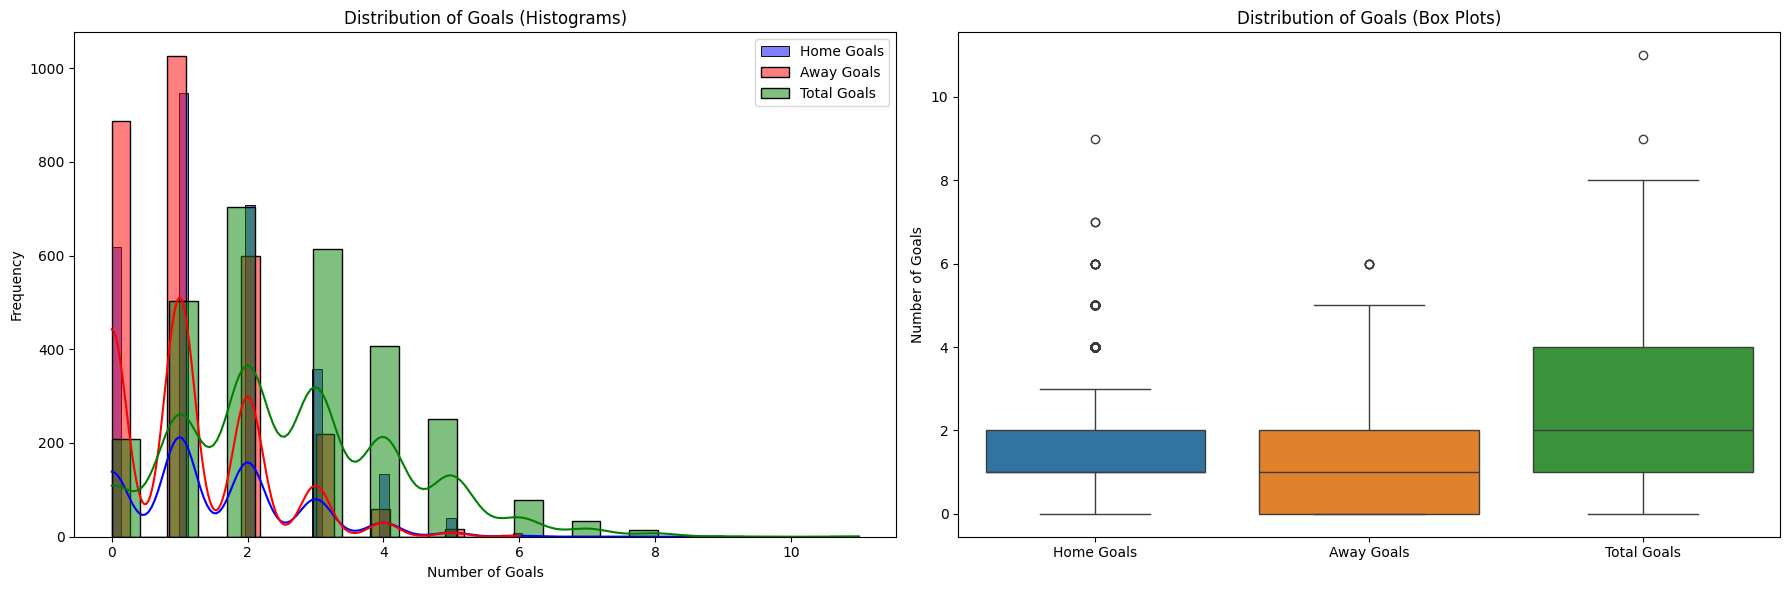


Descriptive statistics for goal columns:
       home_goals_fulltime  away_goals_fulltime  total_goals
count          2813.000000          2813.000000  2813.000000
mean              1.505866             1.148596     2.654461
std               1.224332             1.069074     1.615639
min               0.000000             0.000000     0.000000
25%               1.000000             0.000000     1.000000
50%               1.000000             1.000000     2.000000
75%               2.000000             2.000000     4.000000
max               9.000000             6.000000    11.000000


In [ ]:
data['total_goals'] = data['home_goals_fulltime'] + data['away_goals_fulltime']

plt.figure(figsize=(18, 6))

# Histogramas
plt.subplot(1, 2, 1)
sns.histplot(data['home_goals_fulltime'], kde=True, color='blue', label='Home Goals')
sns.histplot(data['away_goals_fulltime'], kde=True, color='red', label='Away Goals')
sns.histplot(data['total_goals'], kde=True, color='green', label='Total Goals')
plt.title('Distribution of Goals (Histograms)')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.legend()

# Cajas y bigotes
plt.subplot(1, 2, 2)
sns.boxplot(data=data[['home_goals_fulltime', 'away_goals_fulltime', 'total_goals']])
plt.title('Distribution of Goals (Box Plots)')
plt.ylabel('Number of Goals')
plt.xticks(ticks=[0, 1, 2], labels=['Home Goals', 'Away Goals', 'Total Goals'])

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for goal columns:")
print(data[['home_goals_fulltime', 'away_goals_fulltime', 'total_goals']].describe())

## Análisis de Rendimiento de Equipos y Resultados



In [ ]:
def get_match_result(row):
    if row['home_goals_fulltime'] > row['away_goals_fulltime']:
        return 'Home Win'
    elif row['away_goals_fulltime'] > row['home_goals_fulltime']:
        return 'Away Win'
    else:
        return 'Draw'

data['match_result'] = data.apply(get_match_result, axis=1)
print(data[['home_goals_fulltime', 'away_goals_fulltime', 'match_result']].head())

   home_goals_fulltime  away_goals_fulltime match_result
0                  2.0                  4.0     Away Win
1                  0.0                  0.0         Draw
2                  1.0                  3.0     Away Win
3                  2.0                  3.0     Away Win
4                  0.0                  0.0         Draw


In [ ]:
unique_teams = pd.concat([data['home_team'], data['away_team']]).unique()
print(f"Number of unique teams: {len(unique_teams)}")
print(f"Unique teams: {unique_teams}")

Number of unique teams: 24
Unique teams: ['Mazatlán' 'Guadalajara Chivas' 'Necaxa' 'Tigres UANL' 'Club America'
 'U.N.A.M. - Pumas' 'Atletico San Luis' 'Santos Laguna' 'Pachuca'
 'Club Tijuana' 'Puebla' 'Leon' 'Monterrey' 'Cruz Azul' 'Toluca'
 'Club Queretaro' 'FC Juarez' 'Atlas' 'León' 'Monarcas' 'Lobos Buap'
 'Veracruz' 'Jaguares de Chiapas' 'Atlético San Luis']


In [ ]:
team_stats = {}

for team in unique_teams:

    home_matches = data[data['home_team'] == team]

    away_matches = data[data['away_team'] == team]

    total_matches = len(home_matches) + len(away_matches)

    goals_scored = home_matches['home_goals_fulltime'].sum() + away_matches['away_goals_fulltime'].sum()

    goals_conceded = home_matches['away_goals_fulltime'].sum() + away_matches['home_goals_fulltime'].sum()

    wins = len(home_matches[home_matches['match_result'] == 'Home Win']) + len(away_matches[away_matches['match_result'] == 'Away Win'])

    draws = len(home_matches[home_matches['match_result'] == 'Draw']) + len(away_matches[away_matches['match_result'] == 'Draw'])

    losses = len(home_matches[home_matches['match_result'] == 'Away Win']) + len(away_matches[away_matches['match_result'] == 'Home Win'])

    team_stats[team] = {
        'Total Matches': total_matches,
        'Goals Scored': goals_scored,
        'Goals Conceded': goals_conceded,
        'Wins': wins,
        'Draws': draws,
        'Losses': losses
    }

team_performance = pd.DataFrame.from_dict(team_stats, orient='index')
print(team_performance.head())


                    Total Matches  Goals Scored  Goals Conceded  Wins  Draws  \
Mazatlán                      155         176.0           252.0    38     41   
Guadalajara Chivas            322         384.0           358.0   116    104   
Necaxa                        305         365.0           402.0    91     96   
Tigres UANL                   352         524.0           334.0   163    110   
Club America                  357         573.0           368.0   177    107   

                    Losses  
Mazatlán                76  
Guadalajara Chivas     102  
Necaxa                 118  
Tigres UANL             79  
Club America            73  


In [ ]:
team_performance['Goal Difference'] = team_performance['Goals Scored'] - team_performance['Goals Conceded']
team_performance['Points'] = (team_performance['Wins'] * 3) + (team_performance['Draws'] * 1)

print("Team Performance with Goal Difference and Points:")
print(team_performance.head())

Team Performance with Goal Difference and Points:
                    Total Matches  Goals Scored  Goals Conceded  Wins  Draws  \
Mazatlán                      155         176.0           252.0    38     41   
Guadalajara Chivas            322         384.0           358.0   116    104   
Necaxa                        305         365.0           402.0    91     96   
Tigres UANL                   352         524.0           334.0   163    110   
Club America                  357         573.0           368.0   177    107   

                    Losses  Goal Difference  Points  
Mazatlán                76            -76.0     155  
Guadalajara Chivas     102             26.0     452  
Necaxa                 118            -37.0     369  
Tigres UANL             79            190.0     599  
Club America            73            205.0     638  


In [ ]:
print("\nTop 5 teams by Points:")
print(team_performance.sort_values(by='Points', ascending=False).head(5))

print("\nTop 5 teams by Goal Difference:")
print(team_performance.sort_values(by='Goal Difference', ascending=False).head(5))


Top 5 teams by Points:
              Total Matches  Goals Scored  Goals Conceded  Wins  Draws  \
Club America            357         573.0           368.0   177    107   
Tigres UANL             352         524.0           334.0   163    110   
Monterrey               341         520.0           355.0   157     99   
Cruz Azul               328         446.0           361.0   141     92   
Leon                    322         464.0           405.0   134     85   

              Losses  Goal Difference  Points  
Club America      73            205.0     638  
Tigres UANL       79            190.0     599  
Monterrey         85            165.0     570  
Cruz Azul         95             85.0     515  
Leon             103             59.0     487  

Top 5 teams by Goal Difference:
              Total Matches  Goals Scored  Goals Conceded  Wins  Draws  \
Club America            357         573.0           368.0   177    107   
Tigres UANL             352         524.0           334.0   16

In [ ]:
print("\nBottom 5 teams by Points:")
print(team_performance.sort_values(by='Points', ascending=True).head(5))

print("\nBottom 5 teams by Goal Difference:")
print(team_performance.sort_values(by='Goal Difference', ascending=True).head(5))


Bottom 5 teams by Points:
                     Total Matches  Goals Scored  Goals Conceded  Wins  Draws  \
León                             1           2.0             2.0     0      1   
Atlético San Luis                1           3.0             1.0     1      0   
Jaguares de Chiapas             34          27.0            58.0     7      7   
Lobos Buap                      68          82.0           123.0    20     11   
Veracruz                       120          97.0           230.0    22     21   

                     Losses  Goal Difference  Points  
León                      0              0.0       1  
Atlético San Luis         0              2.0       3  
Jaguares de Chiapas      20            -31.0      28  
Lobos Buap               37            -41.0      71  
Veracruz                 77           -133.0      87  

Bottom 5 teams by Goal Difference:
                Total Matches  Goals Scored  Goals Conceded  Wins  Draws  \
Veracruz                  120          97.0 

### Mejores equipos por desempeño (Goles y Puntos)

/tmp/ipython-input-721791289.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_points.index, y='Points', data=top_5_points, palette='viridis')
/tmp/ipython-input-721791289.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_goal_diff.index, y='Goal Difference', data=top_5_goal_diff, palette='magma')


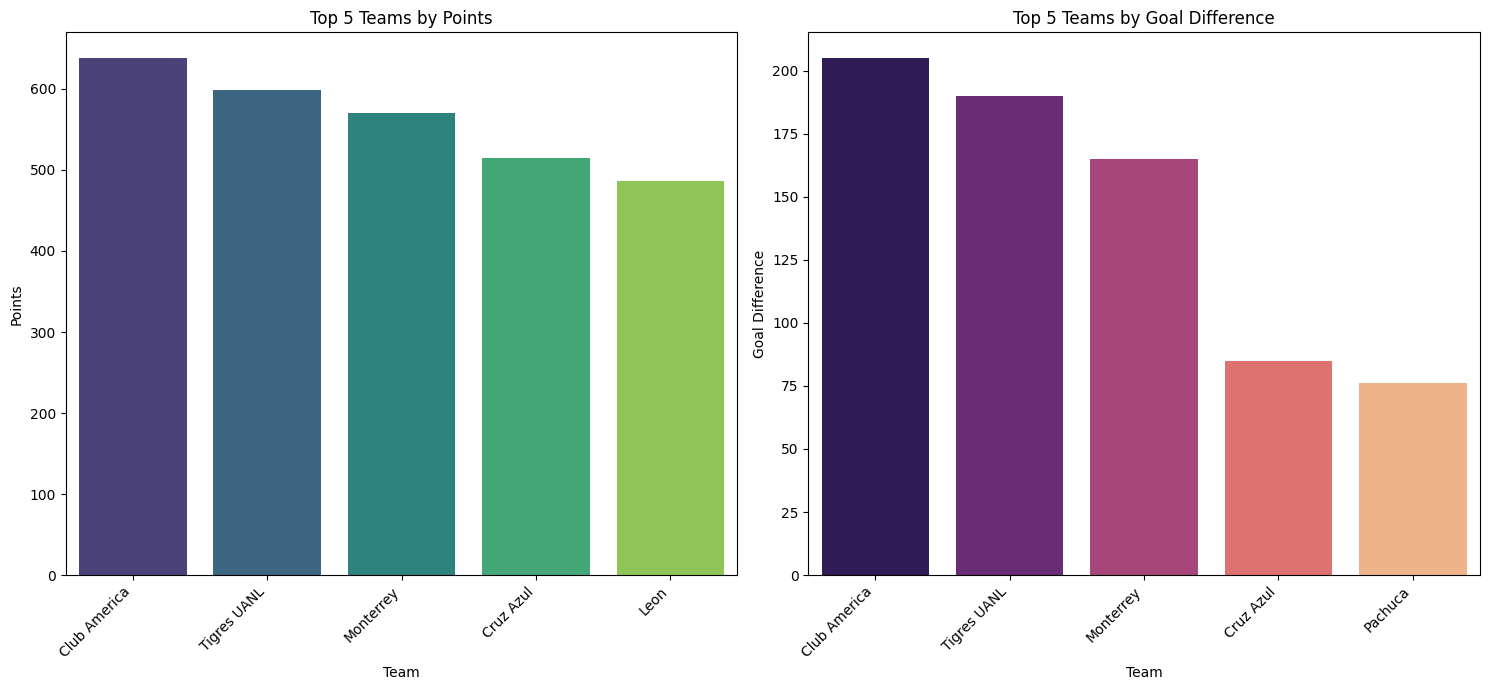

In [ ]:
top_5_points = team_performance.sort_values(by='Points', ascending=False).head(5)
top_5_goal_diff = team_performance.sort_values(by='Goal Difference', ascending=False).head(5)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=top_5_points.index, y='Points', data=top_5_points, palette='viridis')
plt.title('Top 5 Teams by Points')
plt.xlabel('Team')
plt.ylabel('Points')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=top_5_goal_diff.index, y='Goal Difference', data=top_5_goal_diff, palette='magma')
plt.title('Top 5 Teams by Goal Difference')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Diferencia de Goles entre equipos

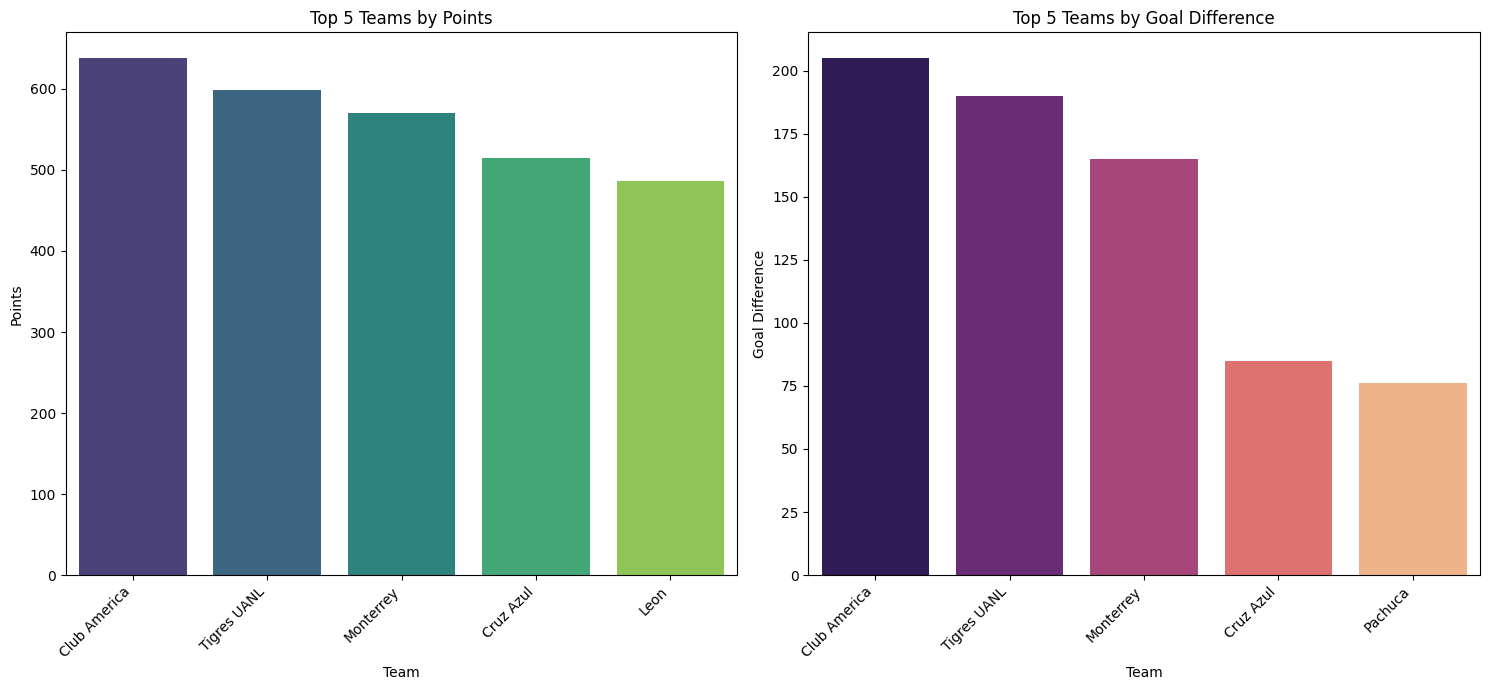

In [ ]:
top_5_points = team_performance.sort_values(by='Points', ascending=False).head(5)
top_5_goal_diff = team_performance.sort_values(by='Goal Difference', ascending=False).head(5)

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=top_5_points.index, y='Points', hue=top_5_points.index, data=top_5_points, palette='viridis', legend=False)
plt.title('Top 5 Teams by Points')
plt.xlabel('Team')
plt.ylabel('Points')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(x=top_5_goal_diff.index, y='Goal Difference', hue=top_5_goal_diff.index, data=top_5_goal_diff, palette='magma', legend=False)
plt.title('Top 5 Teams by Goal Difference')
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Análisis Temporal/ promedio de goles por temporada



In [ ]:
avg_goals_per_season = data.groupby('season')['total_goals'].mean().reset_index()
print(avg_goals_per_season.head())

   season  total_goals
0    2016     2.619760
1    2017     2.556886
2    2018     2.679641
3    2019     2.923636
4    2020     2.456140


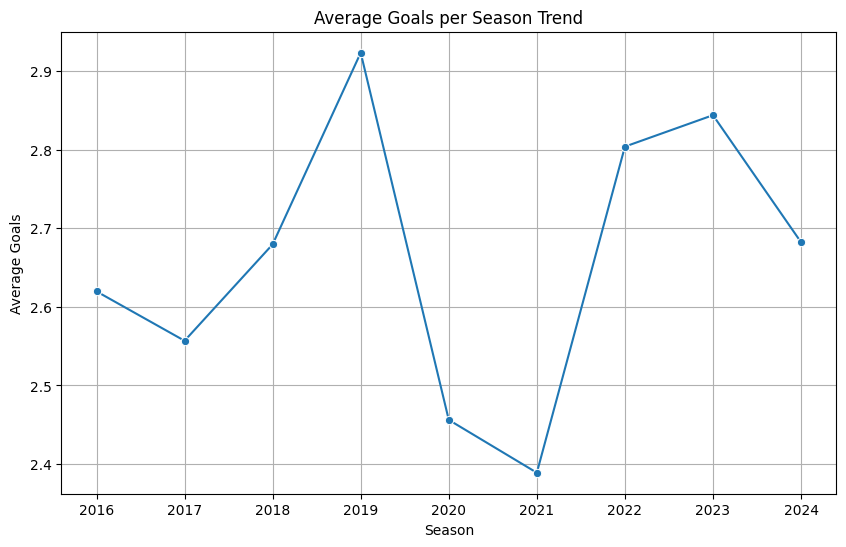

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='total_goals', data=avg_goals_per_season, marker='o')
plt.title('Average Goals per Season Trend')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.grid(True)
plt.show()

### Resultados por temporada de cada encuentro

In [ ]:
match_results_per_season = data.groupby(['season', 'match_result']).size().unstack(fill_value=0)
print(match_results_per_season.head())

match_result  Away Win  Draw  Home Win
season                                
2016                87    98       149
2017                96    97       141
2018                92    82       160
2019                87   129       122
2020                91    86       165


In [ ]:
match_results_proportion = match_results_per_season.div(match_results_per_season.sum(axis=1), axis=0)
print(match_results_proportion.head())

match_result  Away Win      Draw  Home Win
season                                    
2016          0.260479  0.293413  0.446108
2017          0.287425  0.290419  0.422156
2018          0.275449  0.245509  0.479042
2019          0.257396  0.381657  0.360947
2020          0.266082  0.251462  0.482456


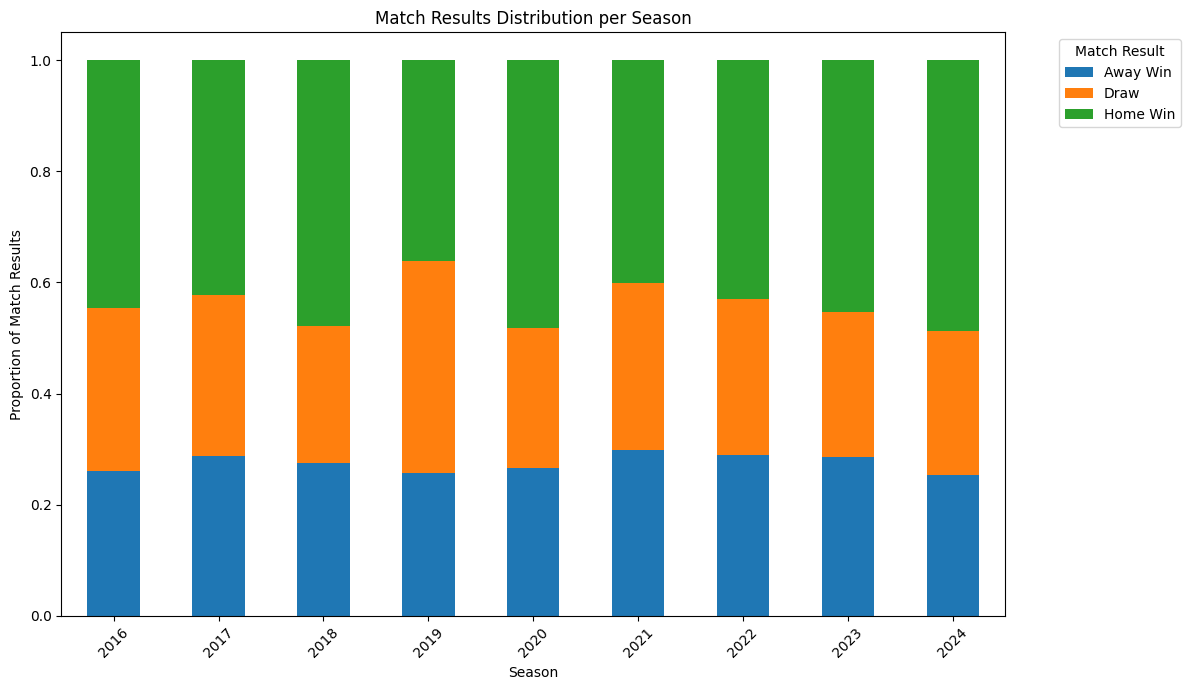

In [ ]:
plt.figure(figsize=(12, 7))
match_results_proportion.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Match Results Distribution per Season')
plt.xlabel('Season')
plt.ylabel('Proportion of Match Results')
plt.xticks(rotation=45)
plt.legend(title='Match Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Finalizar Tarea


In [ ]:
relevant_cols = ['home_goals', 'away_goals', 'home_goals_half_time', 'away_goals_half_time', 'home_goals_fulltime', 'away_goals_fulltime', 'total_goals']
correlation_data = data[relevant_cols]
print(correlation_data.head())

   home_goals  away_goals  home_goals_half_time  away_goals_half_time  \
0         2.0         4.0                   0.0                   2.0   
1         0.0         0.0                   0.0                   0.0   
2         1.0         3.0                   1.0                   2.0   
3         2.0         3.0                   0.0                   1.0   
4         0.0         0.0                   0.0                   0.0   

   home_goals_fulltime  away_goals_fulltime  total_goals  
0                  2.0                  4.0          6.0  
1                  0.0                  0.0          0.0  
2                  1.0                  3.0          4.0  
3                  2.0                  3.0          5.0  
4                  0.0                  0.0          0.0  


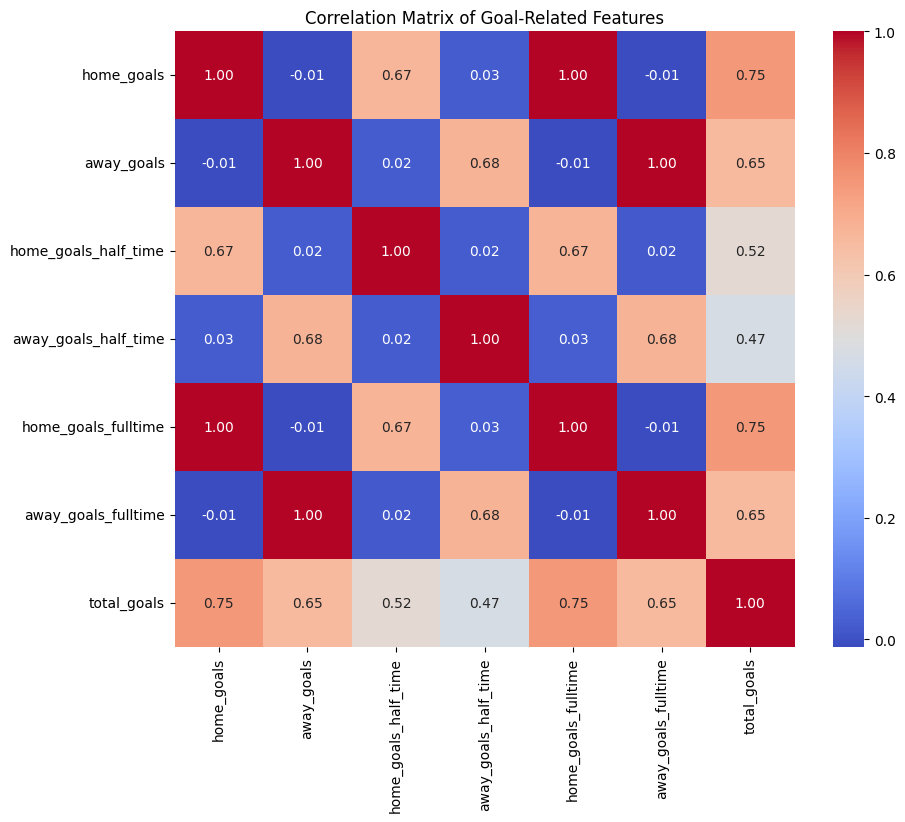


Correlation with Total Goals:
total_goals             1.000000
home_goals_fulltime     0.749808
home_goals              0.747677
away_goals_fulltime     0.652551
away_goals              0.652139
home_goals_half_time    0.523452
away_goals_half_time    0.469509
Name: total_goals, dtype: float64


In [ ]:
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Goal-Related Features')
plt.show()

print("\nCorrelation with Total Goals:")
print(correlation_matrix['total_goals'].sort_values(ascending=False))

## Arbitros

In [ ]:
cutoff_date = pd.to_datetime('2020-03-01').tz_localize('UTC')

pre_pandemic_data = data[data['date'] < cutoff_date]
post_pandemic_data = data[data['date'] >= cutoff_date]

print("Pre-Pandemic Data (first 5 rows):")
print(pre_pandemic_data.head())
print(f"\nShape of Pre-Pandemic Data: {pre_pandemic_data.shape}")

print("\nPost-Pandemic Data (first 5 rows):")
print(post_pandemic_data.head())
print(f"\nShape of Post-Pandemic Data: {post_pandemic_data.shape}")

Pre-Pandemic Data (first 5 rows):
          id                             referee timezone  \
1366  143426    Marco Antonio Ortiz Nava, Mexico      UTC   
1367  143427       Roberto Garcia Orozco, Mexico      UTC   
1368  143429                Oscar Macias, Mexico      UTC   
1369  143428  Erick Yair Miranda Galindo, Mexico      UTC   
1370  143430   Jorge Antonio Perez Duran, Mexico      UTC   

                          date  venue_id                          venue_name  \
1366 2017-07-22 00:00:00+00:00       NaN  Estadio Jose Maria Morelos y Pavon   
1367 2017-07-22 02:00:00+00:00    1088.0                    Estadio Caliente   
1368 2017-07-22 22:00:00+00:00       NaN                      Estadio Azteca   
1369 2017-07-22 22:00:00+00:00    1078.0          Estadio Universitario BUAP   
1370 2017-07-23 00:00:00+00:00       NaN        Estadio Universitario (UANL)   

       venue_city  season         round     home_team  ...  \
1366      Morelia    2017  Apertura - 1      Monarcas  .

## Análisis Comparativo de Goles Promedio Pre Vs Post pandemia



In [ ]:
avg_goals_pre_pandemic = pre_pandemic_data['total_goals'].mean()
avg_goals_post_pandemic = post_pandemic_data['total_goals'].mean()

avg_goals_comparison = pd.Series({
    'Pre-Pandemic': avg_goals_pre_pandemic,
    'Post-Pandemic': avg_goals_post_pandemic
})

print("Average Total Goals Comparison:")
print(avg_goals_comparison)

Average Total Goals Comparison:
Pre-Pandemic     2.676494
Post-Pandemic    2.636714
dtype: float64


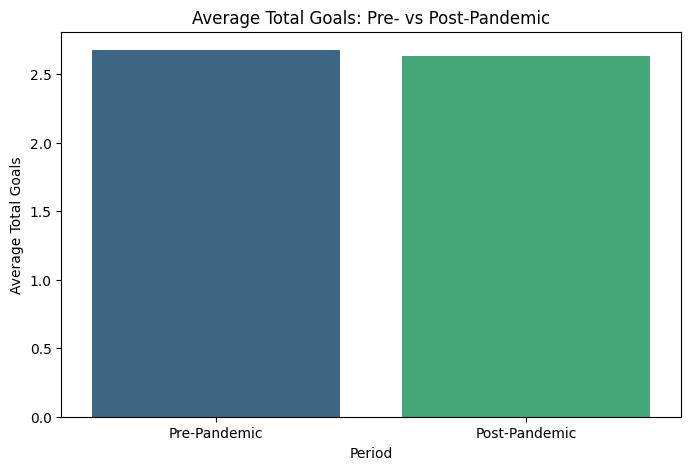

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_goals_comparison.index, y=avg_goals_comparison.values, hue=avg_goals_comparison.index, palette='viridis', legend=False)
plt.title('Average Total Goals: Pre- vs Post-Pandemic')
plt.xlabel('Period')
plt.ylabel('Average Total Goals')
plt.ylim(bottom=0) # Ensure y-axis starts from 0
plt.show()

## Análisis Comparativo de Resultados de Partidos Pre vs Postpandemia




In [ ]:
pre_pandemic_results = pre_pandemic_data['match_result'].value_counts(normalize=True)
post_pandemic_results = post_pandemic_data['match_result'].value_counts(normalize=True)

match_results_comparison = pd.DataFrame({
    'Pre-Pandemic': pre_pandemic_results,
    'Post-Pandemic': post_pandemic_results
}).T

print("Match Results Proportion Comparison:")
print(match_results_comparison)

Match Results Proportion Comparison:
match_result   Away Win      Draw  Home Win
Pre-Pandemic   0.282869  0.269323  0.447809
Post-Pandemic  0.270820  0.299815  0.429365


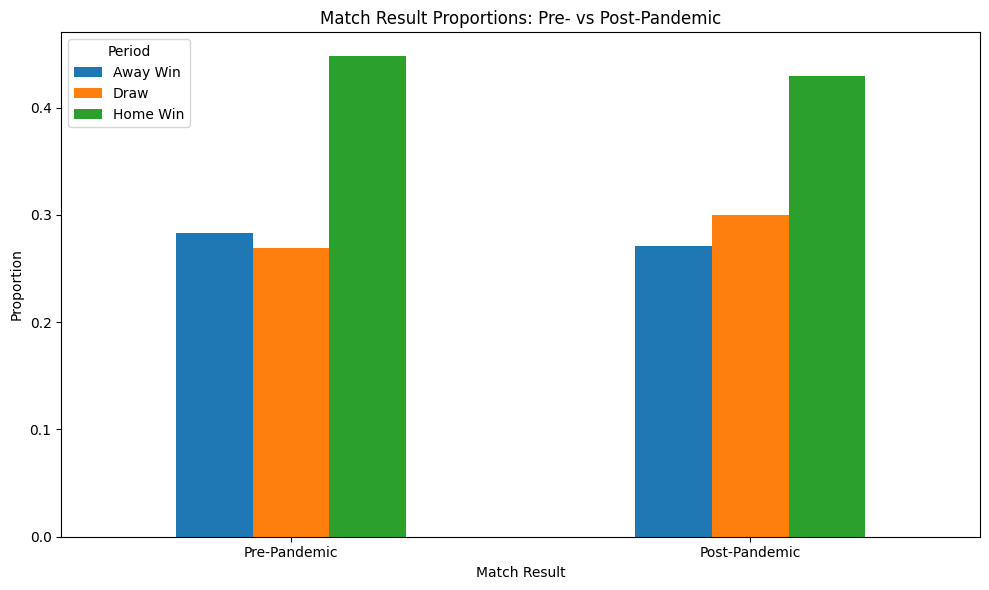

In [ ]:
match_results_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Match Result Proportions: Pre- vs Post-Pandemic')
plt.xlabel('Match Result')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Period')
plt.tight_layout()
plt.show()